In [1]:
import sys
sys.path.append('../..')

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Individual

In [2]:
grid = 5
sub_grid = 5

folder = f'/storage/arnaud/real_data_test_results/threshold_tests-{grid}_{grid}-{sub_grid}_{sub_grid}/'

In [3]:
files = os.listdir(folder)
files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

# Gather thresholds
theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
theshold_scales.sort()

# Gather environment ids
environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
environment_ids.sort()

# Building results dataframe
rows = []
for thresh_scale in theshold_scales:
    for env_i in environment_ids:
        df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

        rows.append({
            'threshold': thresh_scale,
            'environment': env_i,
            'convergence': df['converged']['mean'],
            'convergence_std': df['converged']['standard_deviation'],
            'steps_taken': df['steps_taken']['success_mean'],
            'steps_taken_std': df['steps_taken']['success_standard_deviation']
        })
results_df = pd.DataFrame(rows)

In [4]:
results_df

,threshold,environment,convergence,convergence_std,steps_taken,steps_taken_std
0,1,0,0.7773085585585585,0.41605283720961994,783.743571,257.629717
1,1,1,0.0,0.0,NaN,NaN
2,1,2,0.9994369369369369,0.023722268505564078,329.936056,81.964480
3,1,3,0.4895833333333333,0.49989148127924277,811.200115,263.653524
4,1,4,0.20242117117117117,0.4018044806032688,674.959666,305.074528
...,...,...,...,...,...,...
91,8,7,0.010416666666666666,0.1015291077584267,389.864865,94.748545
92,8,8,0.0,0.0,NaN,NaN
93,8,9,0.22550675675675674,0.4179156127901968,157.790262,78.486422
94,8,10,0.2592905405405405,0.4382453150083122,503.226927,187.624033


In [5]:
# source_positions = []
# for env_i in environment_ids:
#     df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
#     env_source_pos = np.array([int(part) for part in df['environment'][4].split('_')])
#     source_positions.append(env_source_pos)

## For all

In [6]:
def get_results(grid, subgrid) -> pd.DataFrame:
    folder = f'/storage/arnaud/real_data_test_results/threshold_tests-{grid}_{grid}-{subgrid}_{subgrid}/'

    # Gather files
    files = os.listdir(folder)
    files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

    # Gather thresholds
    theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
    theshold_scales.sort()

    # Gather environment ids
    environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
    environment_ids.sort()

    # Building results dataframe
    rows = []
    for thresh_scale in theshold_scales:
        for env_i in environment_ids:
            df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

            rows.append({
                'threshold': thresh_scale,
                'environment': env_i,
                'convergence': df['converged']['mean'],
                'convergence_std': df['converged']['standard_deviation'],
                'steps_taken': df['steps_taken']['success_mean'],
                'steps_taken_std': df['steps_taken']['success_standard_deviation']
            })
    results_df = pd.DataFrame(rows)

    return results_df

In [7]:
all_test_grids = np.array([
    [5,5],
    [5,7],
    [7,5],
    [7,7],
    [9,5],
    [9,7]
])

all_result_dfs = [get_results(grid, subgrid) for grid, subgrid in all_test_grids]

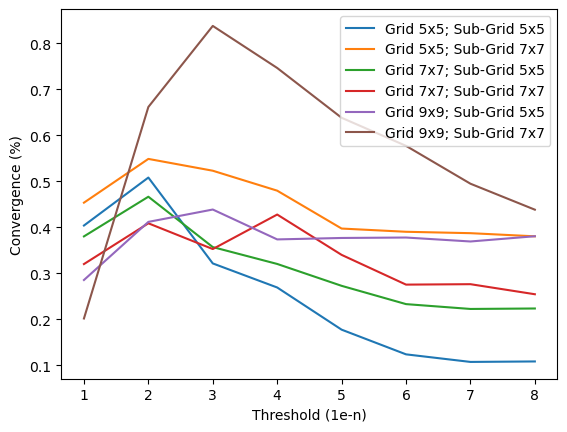

In [8]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

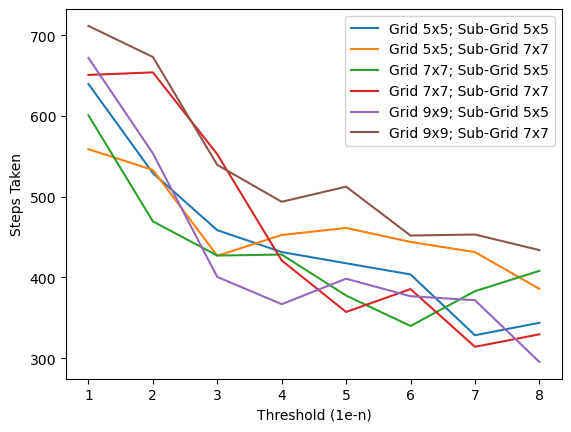

In [9]:
metric_label = 'steps_taken'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'Steps Taken')
plt.legend()
plt.show()

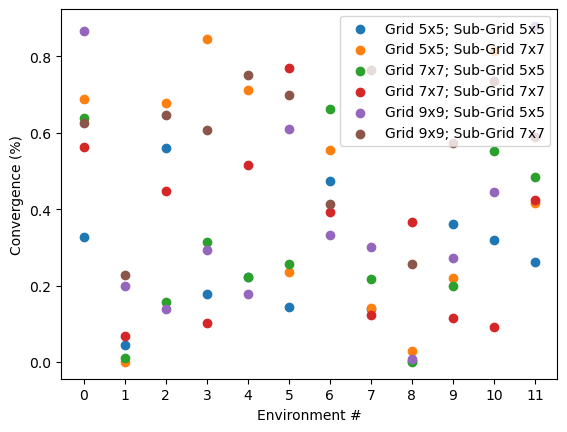

In [10]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

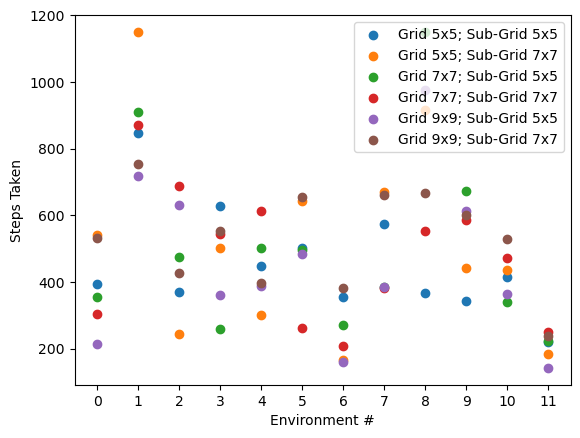

In [11]:
metric_label = 'steps_taken'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'Steps Taken')
plt.legend()
plt.show()

In [12]:
# plt.imshow(np.zeros((111,142)), cmap='Greys')
# for env_i, source_pos in zip(environment_ids, source_positions):
#     plt.scatter(source_pos[1], source_pos[0], label=f'Env-{env_i}')

# plt.legend()

## Best model Threshold plots

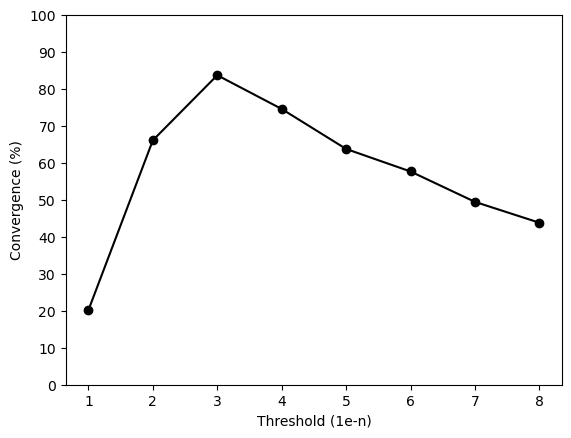

In [13]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid != 9 or subgrid != 7:
        continue
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                 marker='o',
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, labels=np.arange(11)*10)
# plt.legend()
plt.show()

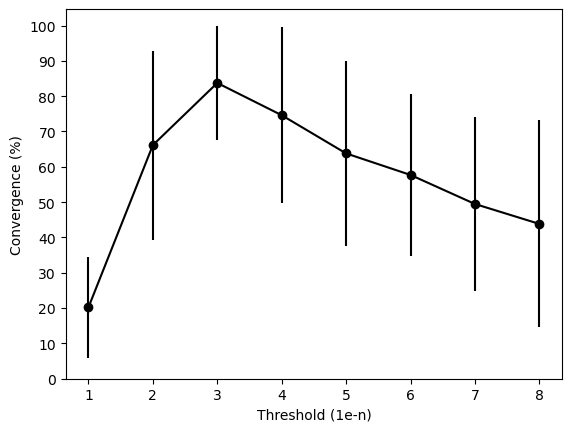

In [14]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid != 9 or subgrid != 7:
        continue
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                 marker='o',
                 yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, labels=np.arange(11)*10)
# plt.legend()
plt.show()

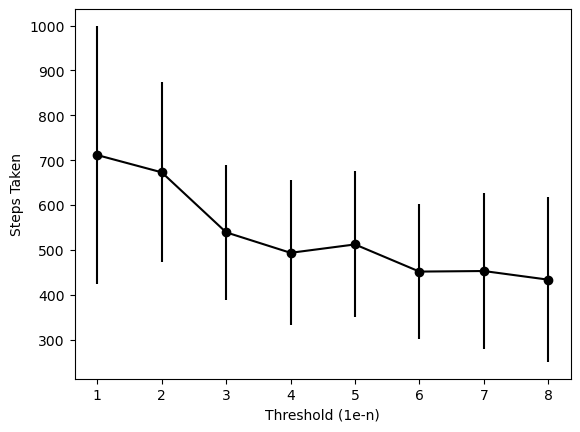

In [16]:
metric_label = 'steps_taken'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid != 9 or subgrid != 7:
        continue
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                 marker='o',
                 yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'Steps Taken')
# plt.yticks(np.arange(11)/10, labels=np.arange(11)*10)
# plt.legend()
plt.show()

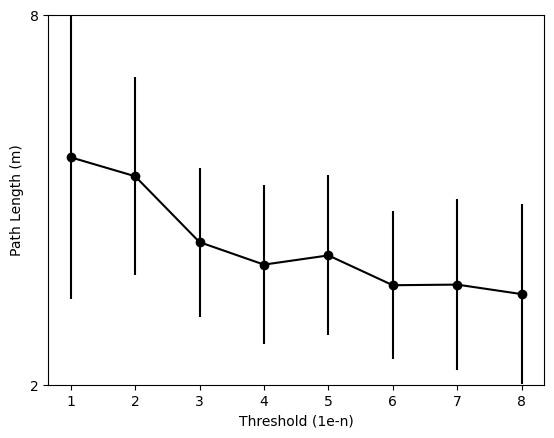

In [16]:
metric_label = 'steps_taken'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid != 9 or subgrid != 7:
        continue
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                 marker='o',
                 yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'Path Length (m)')
plt.yticks([250,1000], [2, 8])
plt.ylim(250,1000)
# plt.legend()
plt.show()

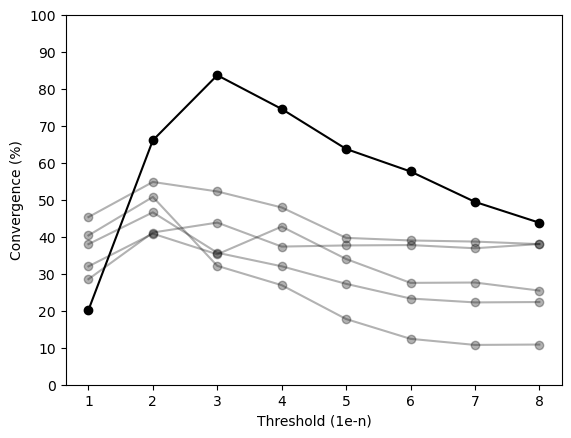

In [15]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                 marker='o',
                 alpha=(0.3 if grid != 9 or subgrid != 7 else 1),
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, labels=np.arange(11)*10)
# plt.legend()
plt.show()

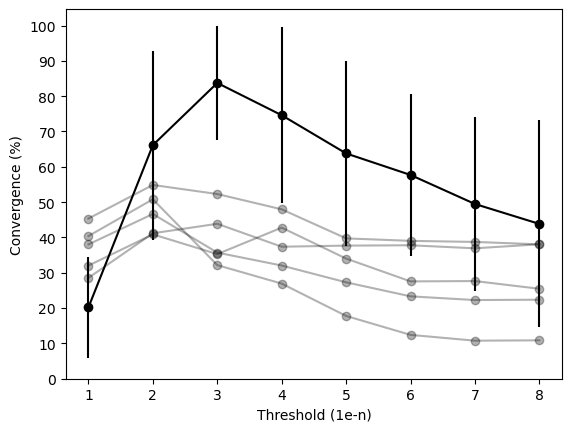

In [16]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    if grid != 9 or subgrid != 7:
        plt.errorbar(theshold_scales,
                    metric,
                    marker='o',
                    alpha=0.3,
                    label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                    color='black')
    else:
        plt.errorbar(theshold_scales,
                    metric,
                    marker='o',
                     yerr=metric_std,
                    label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                    color='black')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, labels=np.arange(11)*10)
# plt.legend()
plt.show()

## Source position plot

Model 9 by 7; Threshold 1e-1

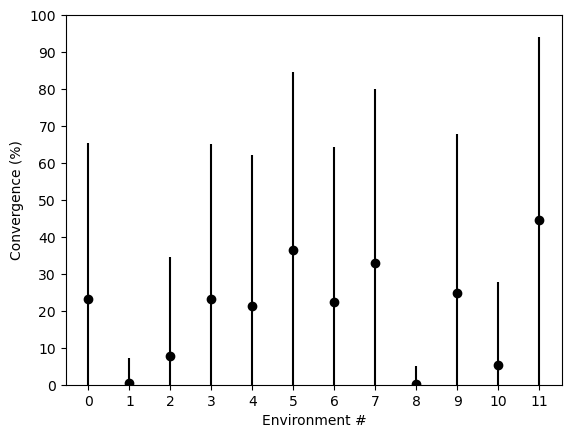

In [17]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid != 9 or subgrid != 7:
        continue
    metric = np.array(res_df[res_df['threshold'] == 1][metric_label.lower()]).astype(float)
    metric_std = np.array(res_df[res_df['threshold'] == 1][metric_label.lower() + '_std']).astype(float)
    plt.errorbar(environment_ids,
                 metric,
                 yerr=metric_std,
                 fmt='o',
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, labels=np.arange(11)*10)
plt.ylim(bottom=0)
plt.show()

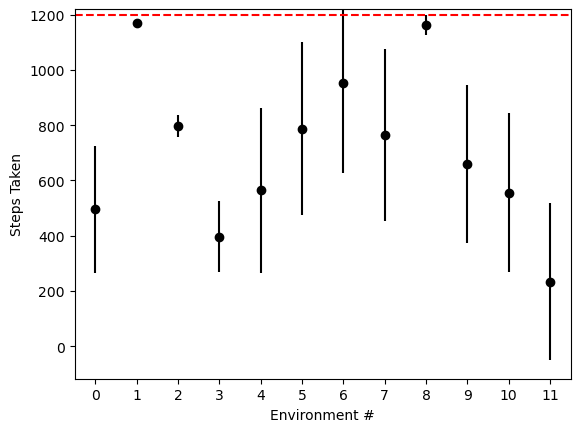

In [20]:
metric_label = 'steps_taken'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    if grid != 9 or subgrid != 7:
        continue
    metric = np.array(res_df[res_df['threshold'] == 1][metric_label.lower()]).astype(float)
    metric_std = np.array(res_df[res_df['threshold'] == 1][metric_label.lower() + '_std']).astype(float)
    plt.errorbar(environment_ids,
                 metric,
                 yerr=metric_std,
                 fmt='o',
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}',
                 color='black')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'Steps Taken')
plt.hlines(y=1199,xmin=-0.5,xmax=11.5, linestyles='dashed', colors='red')
plt.xlim(-0.5, 11.5)
plt.ylim(top=1220)
# plt.legend()
plt.show()

In [21]:
source_positions = []
for env_i in environment_ids:
    df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
    env_source_pos = np.array([int(part) for part in df['environment'][4].split('_')])
    source_positions.append(env_source_pos)

/tmp/ipykernel_594420/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_594420/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_594420/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_594420/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipykernel_594420/1846508608.py:3: DtypeWarning: Columns (7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
/tmp/ipyke

Text(105, 57, 'Agent Start')

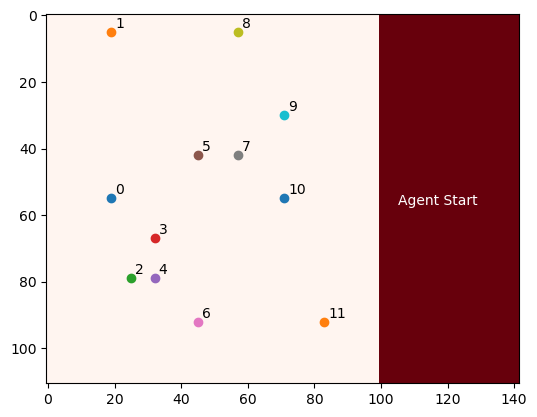

In [22]:
plt.imshow(np.zeros((111,142)), cmap='Greys')
ax = plt.gca()
for env_i, source_pos in zip(environment_ids, source_positions):
    plt.scatter(source_pos[1], source_pos[0], label=f'Env-{env_i}')
    ax.annotate(f'{env_i}', xy=source_pos[::-1], xytext=(3,3), textcoords='offset points')

zone = np.zeros((111,142))
zone[:,100:] = 1.0
plt.imshow(zone, cmap='Reds')
ax.annotate(f'Agent Start', xy=(105, 57), color='white')

# plt.legend()

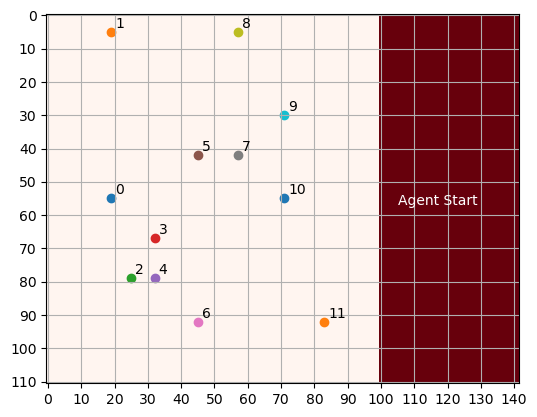

In [23]:
plt.imshow(np.zeros((111,142)), cmap='Greys')
ax = plt.gca()
for env_i, source_pos in zip(environment_ids, source_positions):
    plt.scatter(source_pos[1], source_pos[0], label=f'Env-{env_i}')
    ax.annotate(f'{env_i}', xy=source_pos[::-1], xytext=(3,3), textcoords='offset points')

zone = np.zeros((111,142))
zone[:,100:] = 1.0
plt.imshow(zone, cmap='Reds')
ax.annotate(f'Agent Start', xy=(105, 57), color='white')

plt.yticks(np.arange(12)*10)
plt.xticks(np.arange(15)*10)
plt.grid()

# plt.legend()

In [40]:
grid = np.full((111,142), -1)

vert_sizes = [25, 20, 20, 20, 26]
hori_sizes = [30, 20, 20, 30]

i = 0
for vi, vs in enumerate(vert_sizes):
    for hi, hs in enumerate(hori_sizes):
        prev_vs = sum(vert_sizes[:vi])
        prev_hs = sum(hori_sizes[:hi])

        grid[prev_vs:prev_vs+vs, prev_hs:prev_hs+hs] = i

        i += 1

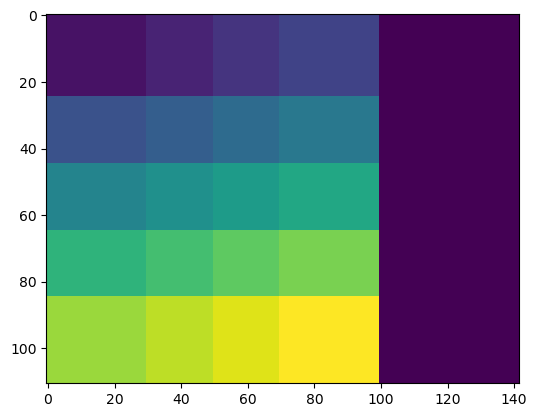

In [41]:
plt.imshow(grid)

In [42]:
indices = np.array(list(np.ndindex((111,142))))

indices_tiles = grid[*indices.T]

source_points_tiles = grid[*np.array(source_positions).T]

convergences = np.array(all_result_dfs[-1][all_result_dfs[-1]['threshold'] == 1]['convergence'])
steps = np.array(all_result_dfs[-1][all_result_dfs[-1]['threshold'] == 1]['steps_taken'])

In [67]:
tile_count = np.prod([len(vert_sizes), len(hori_sizes)])

tile_convergences = np.zeros(tile_count)
tile_steps = np.zeros(tile_count)
tile_sum = np.zeros(tile_count)

for env_i, (tile, source_point) in enumerate(zip(source_points_tiles, source_positions)):
    tile_convergences[tile] += float(convergences[env_i])
    tile_steps[tile] += float(steps[env_i])
    tile_sum[tile] += 1

tile_convergences[tile_sum > 0] /= tile_sum[tile_sum > 0]
tile_steps[tile_sum > 0] /= tile_sum[tile_sum > 0]
tile_convergences[tile_sum == 0] = None
tile_steps[tile_sum == 0] = None

In [68]:
grid_convergence = np.full((111,142), None, dtype=float)
grid_steps = np.full((111,142), None, dtype=float)

for tile in range(tile_count):
    selected_indices = indices[indices_tiles == tile]
    grid_convergence[*selected_indices.T] = tile_convergences[tile]
    grid_steps[*selected_indices.T] = tile_steps[tile]

(0.0, 111.0)

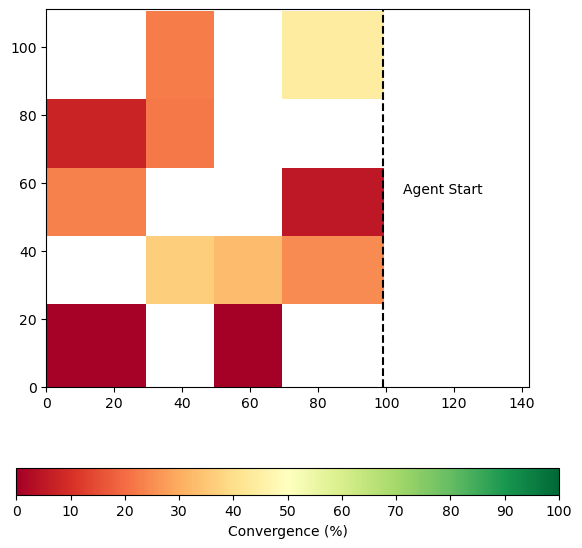

In [73]:
plt.figure(figsize=(7,7))
plt.imshow(grid_convergence, cmap='RdYlGn', vmin=0, vmax=1)
cbar = plt.colorbar(label='Convergence (%)', orientation='horizontal')
cbar.ax.set_xticks(np.arange(11)/10, np.arange(11)*10)
# plt.hlines(np.cumsum(vert_sizes[:-1])-1, xmin=0, xmax=142, color='black')
# plt.vlines(np.cumsum(hori_sizes[:-1])-1, ymin=0, ymax=111, color='black')

plt.vlines(99, ymin=0,ymax=111, linestyles='dashed', color='black')
plt.gca().annotate(f'Agent Start', xy=(105, 57), color='black')

plt.xlim(0,142)
plt.ylim(0,111)

(0.0, 111.0)

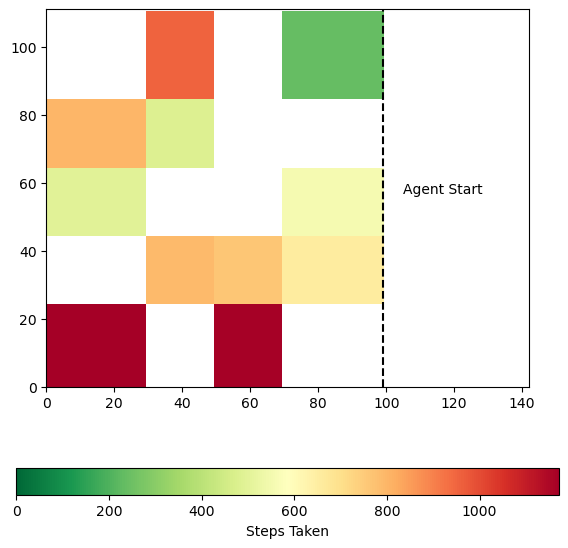

In [74]:
plt.figure(figsize=(7,7))
plt.imshow(grid_steps, cmap='RdYlGn_r', vmin=0)
cbar = plt.colorbar(label='Steps Taken', orientation='horizontal')
# cbar.ax.set_xticks(np.arange(11)/10, np.arange(11)*10)
# plt.hlines(np.cumsum(vert_sizes[:-1])-1, xmin=0, xmax=142, color='black')
# plt.vlines(np.cumsum(hori_sizes[:-1])-1, ymin=0, ymax=111, color='black')

plt.vlines(99, ymin=0,ymax=111, linestyles='dashed', color='black')
plt.gca().annotate(f'Agent Start', xy=(105, 57), color='black')

plt.xlim(0,142)
plt.ylim(0,111)